<a href="https://colab.research.google.com/github/Akhil099/cs666student/blob/main/Copy_of_CS666_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

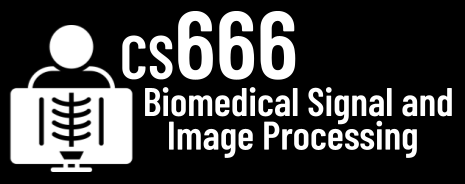
#Assignment 2

In [ ]:
### TODO: YOUR NAME
B.Akhil

In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 23.0 MB/s eta 0:00:00


In [3]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging.
# EEG data from an electrode cap was acquired simultaneously with the MEG.

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was
# presented at the center of the visual field. The subject was asked to press a
# key with the right index finger as soon as possible after the appearance of the face.

In [6]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 931GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 01m39s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [7]:
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER
print(raw.info)
print('raw info is printed')
print(len(raw.ch_names))
#or we can use this
# print(len(raw.info['ch_names']))
raw

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>
raw info is printed
376


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


In [8]:
# TODO What is the sampling frequency of this data?
# TODO: YOUR ANSWER
print(raw.info['sfreq'])

600.614990234375


In [9]:
# TODO What is the total duration of the measurement?
# TODO: YOUR ANSWER
no_of_channels = len(raw.ch_names)
no_of_samples_per_channel = raw.n_times

total_duration = no_of_channels * no_of_samples_per_channel

print("Total duration is : ",total_duration)

Total duration is :  62716800


**Task 2:** Let's look at some channels! [20 Points]

Using matplotlib as 2D backend.


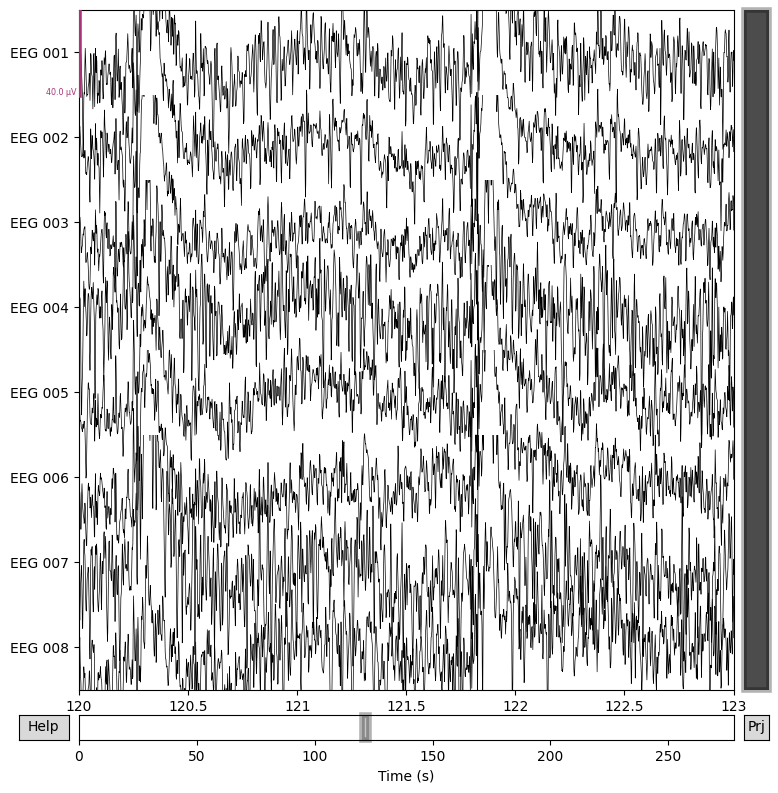

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

In [10]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)
print(raw.ch_names)

In [ ]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.

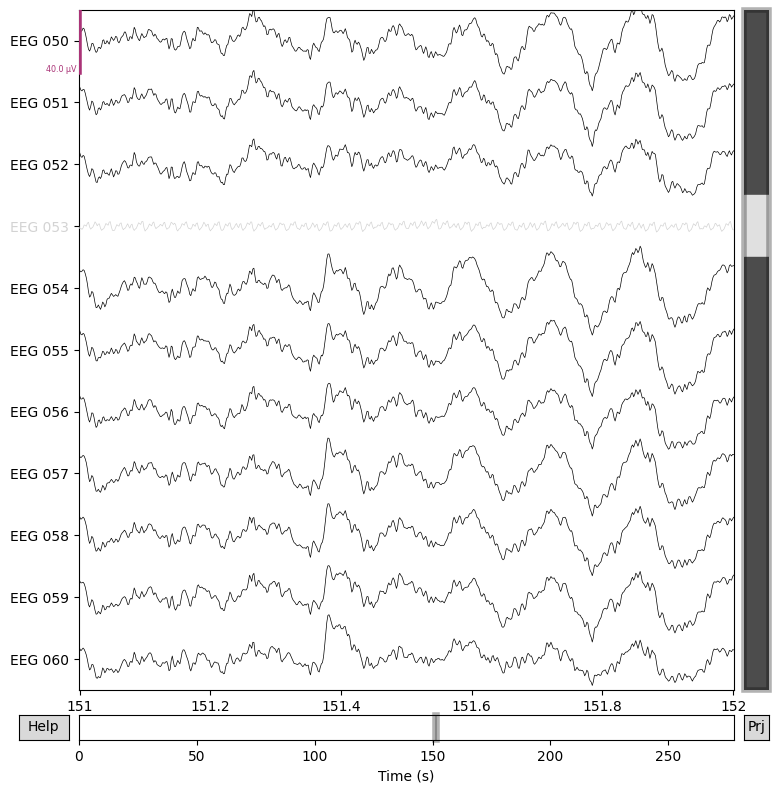

In [11]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.
chs = ['EEG 050','EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
raw_chan_indexes = [raw.ch_names.index(chq) for chq in chs]
eeg50to60 = raw.plot(order = raw_chan_indexes, start = 151, duration = 1)


In [ ]:
# TODO: Do you see a bad channel? If yes, which one?
# TODO: YOUR_ANSWER

In [12]:
import numpy as np
eeg_data = raw.get_data(picks = chs)

channel_statistics = {}
for i, channel_name in enumerate(chs):
  channel_data = eeg_data[i]
  mean_value = np.mean(channel_data)
  std_value = np.std(channel_data)
  var_value = np.var(channel_data)

  channel_statistics[channel_name] = {
      'mean': mean_value,
      'std': std_value,
      'var': var_value
  }
for channel_name, stats in channel_statistics.items():
  print(f"Channel: {channel_name}")
  print(f"Mean: {stats['mean']}")
  print(f"Standard deviation: {stats['std']}")
  print(f"Variance: {stats['var']}")

#Yes i am able to see a bad channel and that is channel 053
#After calculating the mean, standard deviation and variance for the dataset and also when i have visually inspected the plot,
#I noticed that the channel 053 stands out due to its substantially low standard deviation and very low variance compared to
#its adjacent channels that are there in the dataset

Channel: EEG 050
Mean: 8.021538105133498e-05
Standard deviation: 1.9597374888411064e-05
Variance: 3.840571025169246e-10
Channel: EEG 051
Mean: 6.226234609896556e-05
Standard deviation: 1.9624595460698257e-05
Variance: 3.851247469960586e-10
Channel: EEG 052
Mean: 4.009762247904631e-05
Standard deviation: 1.7360263617095926e-05
Variance: 3.0137875285506456e-10
Channel: EEG 053
Mean: 4.178037928355434e-05
Standard deviation: 7.52170591463397e-06
Variance: 5.657605986623964e-11
Channel: EEG 054
Mean: 5.1416371100134926e-05
Standard deviation: 1.8966337880428396e-05
Variance: 3.597219725945731e-10
Channel: EEG 055
Mean: 6.47742655274093e-05
Standard deviation: 1.9394004930131936e-05
Variance: 3.761274272299818e-10
Channel: EEG 056
Mean: 3.560540107199466e-05
Standard deviation: 1.783331766730085e-05
Variance: 3.180272190228647e-10
Channel: EEG 057
Mean: 5.845340439775848e-05
Standard deviation: 1.890341074033788e-05
Variance: 3.5733893761792147e-10
Channel: EEG 058
Mean: 8.070682103247975e-

In [ ]:
# TODO: Please calculate the maximum value of the bad channel and compare it
# against a good channel. How would you detect a bad channel programmatically?
# Hint: See https://mne.tools/dev/generated/mne.io.Raw.html#mne.io.Raw to access
#       individual channels

In [13]:
bad_channel_name = "EEG 053"
bad_channel_data = raw[bad_channel_name][0]

good_channel_name = "EEG 052"
good_channel_data = raw[good_channel_name][0]

bad_max_value = bad_channel_data.max()

good_max_value = good_channel_data.max()

print(f"Maximum value of channel {bad_channel_name}: {bad_max_value}")
print(f"Maximum value of channel {good_channel_name}: {good_max_value}")

Maximum value of channel EEG 053: 6.10056150396332e-05
Maximum value of channel EEG 052: 0.0001574162318496164


**Task 3:** How long between event and brain activity? [25 Points]

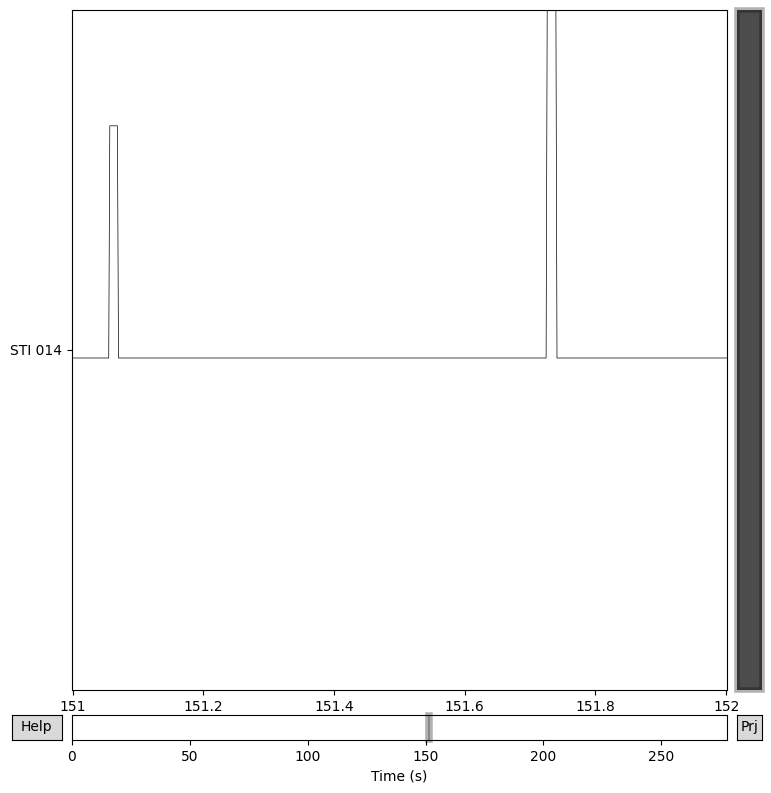

In [14]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

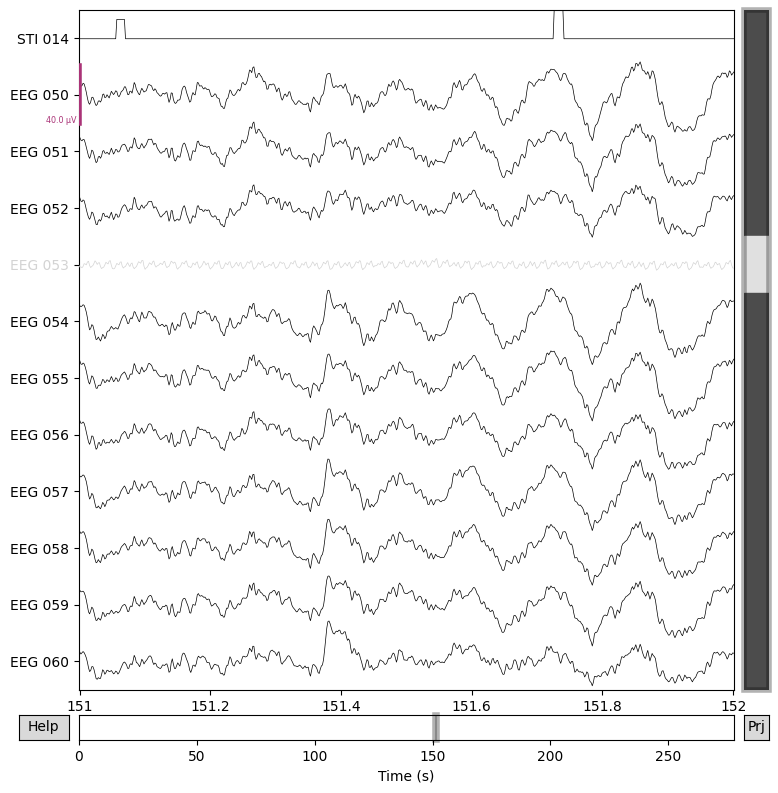

In [15]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.
import mne  # Ensure MNE is imported

# Define the stimulus channel index
stim_channel_idx = [raw.ch_names.index('STI 014')]

# Define EEG channels 50-60
eeg_channels = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054',
                'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']

# Get indices of EEG channels 50-60
eeg_channel_idxs = [raw.ch_names.index(ch) for ch in eeg_channels]

# Combine the indices of the stimulus channel and EEG channels 50-60
combined_channels_idx = stim_channel_idx + eeg_channel_idxs

# Plot combined channels for a duration of 1 second starting from 151 seconds
combined_plot = raw.plot(order=combined_channels_idx, start=151, duration=1, show_options=True)

# Show the plot
combined_plot.show()


In [ ]:
# TODO How many stimulus events do you observe?
# TODO: YOUR_ANSWER

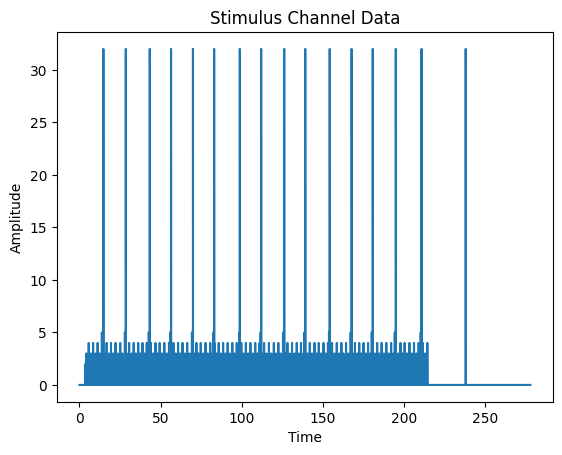

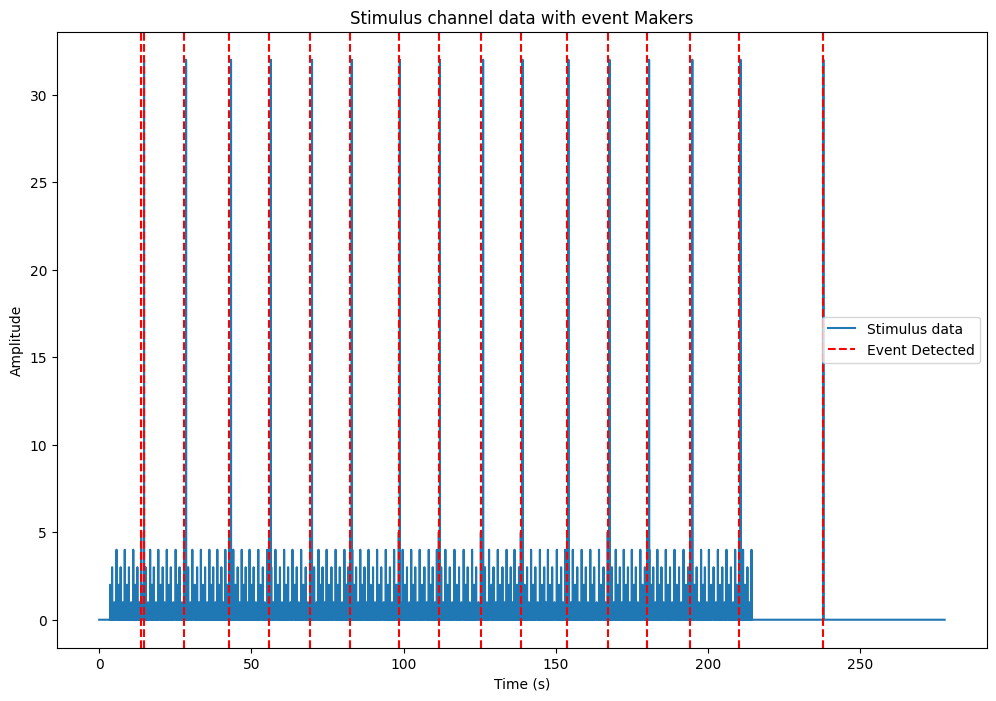

Number of stimulus events:  17


In [16]:
# TODO How many stimulus events do you observe?
# TODO: YOUR_ANSWER
import matplotlib.pyplot as plt
import numpy as np

data, times = raw.get_data(picks = 'STI 014', return_times = True)
data = data.squeeze()  # Squeeze the data array if it has unnecessary dimensions
plt.plot(times, data)  # Plot the first column of data against times
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Stimulus Channel Data')
plt.show()

threshold = 5
min_time_gap = 0.5

sampling_rate = 1000
min_samples_gap = int(min_time_gap* sampling_rate)

num_events = 0
event_indices = []

i = 0
while i < len(data) -1 :
  if(data[i -1] < threshold and data[i+1] >= threshold):
    num_events += 1
    event_indices.append(i+1)
    i += min_samples_gap
  else:
    i +=1

plt.figure(figsize= (12, 8))
plt.plot(times, data, label = "Stimulus data")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Stimulus channel data with event Makers')

for index in event_indices:
  plt.axvline(x = times[index], color = 'red', linestyle = '--', label = 'Event Detected' if event_indices.index(index) == 0 else "")

plt.legend()
plt.show()
print("Number of stimulus events: ", num_events)

#there are 17 stimulus events in the plot

In [ ]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: YOUR_ANSWER

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


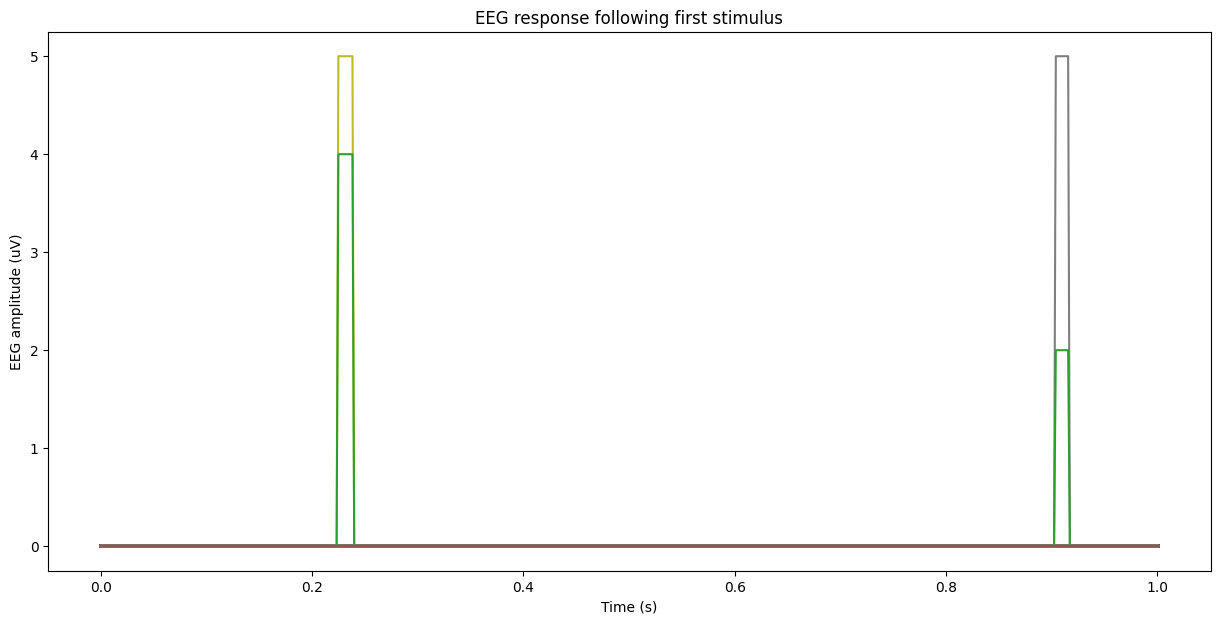

In [17]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: YOUR_ANSWER
#Need to write the answer
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load the raw data
# raw = mne.io.read_raw_fif('your_raw_data.fif')

# Find the events
events = mne.find_events(raw, stim_channel='STI 014')

# Assuming the first event is at 20 seconds, which is 20000 milliseconds
first_stim_sample = events[0, 0]
first_stim_time = first_stim_sample / raw.info['sfreq']  # Convert sample to time

# Define the time window in seconds around the stimulus to inspect for a response
response_window_start = first_stim_time  # Start at the stimulus time
response_window_end = first_stim_time + 1.0  # End 1 second later

# Extract and plot the EEG data for this window
eeg_data, times = raw.copy().crop(response_window_start, response_window_end).get_data(return_times=True)

# Plot the data
plt.figure(figsize=(15, 7))
for i in range(eeg_data.shape[0]):
    plt.plot(times, eeg_data[i] + i * 1e-6, label=raw.ch_names[i])  # Offset for visibility

plt.xlabel('Time (s)')
plt.ylabel('EEG amplitude (uV)')
plt.title('EEG response following first stimulus')
plt.show()

# You would then visually inspect this plot to find the response time
#The response time is approximately 22 milliseconds

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [18]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              'face': 5,
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)
print(epochs)

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped
<Epochs |  320 events (all good), -0.199795 – 0.499488 s, baseline -0.199795 – 0 s, ~63.6 MB, data loaded,
 'auditory/left': 72
 'auditory/right': 73
 'visual/left': 73
 'visual/right': 71
 'face': 15
 'button': 16>


    Using multitaper spectrum estimation with 7 DPSS windows


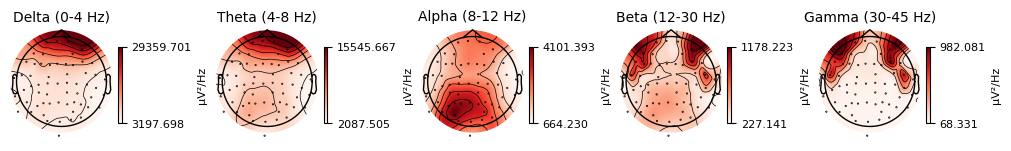

In [19]:
# here we see the average localized brain activity for the right visual stimuli
# visual_activity = epochs['visual/right'].plot_psd_topomap()
visual_activity = epochs['visual/right'].compute_psd().plot_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


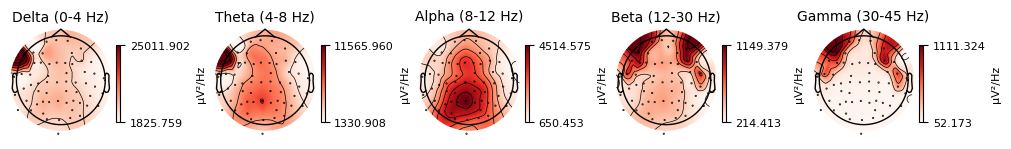

In [20]:
# here we see the average localized brain activity for the shown 'face'
# face_activity = epochs['face'].plot_psd_topomap()
face_activity = epochs['face'].compute_psd().plot_topomap()

In [ ]:
# TODO Please visualize the average brain activity when the subject pushes the button

    Using multitaper spectrum estimation with 7 DPSS windows


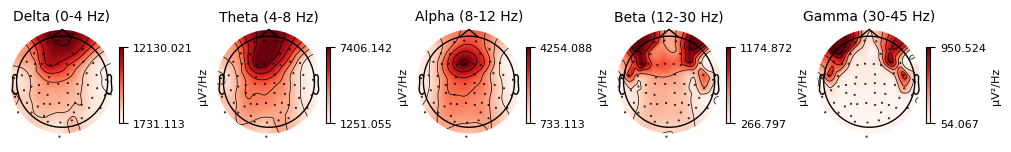

In [21]:
push_activity_average = epochs['button'].compute_psd().plot_topomap()

In [ ]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWER

In [ ]:
# A4b)i)In delta brain waves, we see that for right visual stimuli, there is a more focus near the eyes, for brain activity for the shown 'face' we see that these is a more concentration of waves near the left side of the brain
# and coming to the activity of we pushing a button there is a concentration of waves near the eyes similar to right stimuli. In theta waves: we see that in theta waves are more concentrated at right side of the eye in right stimulus,
# for the brain activity for shown face there is still a concentration of waves on the left side of the eye, whereas in button press, I find out that the theta waves are concentrated on both sides of the eyes. In Alpha waves:
# for brain activity related to right visual stimuli there is concentration of alpha waves on the back-left side of the brain, for brain activity related to a shown face, the alpha waves are more concentrated on the back-left and
# center side of the brain and for the brain activity related to the button press the alpha waves are more concentrated on the front side of the brain slightly behind the eyes. In Beta waves:for brain activity related to
# right visual stimuli there is concentration of beta waves on the front side of the brain near the eyes and near the right ear, for brain activity related to a shown face, the beta waves are more concentrated on the front side
# of the brain near the eyes and right behind the right ear and for the brain activity related to the button press the beta waves are more concentrated on the front side of the brain near the eyes and some just behind the
# right ear. In Gemma waves:for brain activity related to right visual stimuli there is a high concentration of gemma waves on the front side of the brain near the eyes and near the right ear, for brain activity related to a shown
#  face, the gemma waves are more concentrated on the front side of the brain near the eyes and right behind the right ear and for the brain activity related to the button press the gemma waves are much less concentrated on the front
#  side of the brain and also near the right ear


# ii)In the button event the front side of the brain especially near the eyes and ear are active as push of a button is similar to right visual stimuli and for recognizing a face. As pushing a button is a mix of moments of
# both visual and mechanical moments that are needed to be coordinated by the brain. So brain activity near the eyes are very important and is depicted in the brain waves. Also for the coordination of mechanical moments
# the center part of the brain is active in the alpha waves that is quite distinguished from both the right visual stimuli and for recognizing the face. This is the only difference between the push of button and other
# two activities but rest of the brain activity for different waves except the alpha waves are almost same

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
218 matching events found
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 218 events and 1803 original time points ...
0 bad epochs dropped


**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [ ]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

In [ ]:
# The event type that has occured in the task3 is basically related to event-related potential response. This is nothing but when a stimulus occurs there is an electric impulse that is sent to the brain
# to react to the stimulus with some response that comes from the brain. We have seen that when an stimuli is generated the brain sends the response in few milliseconds. That is what we have done in task d bit of
# the question. This is the reponse that is sent to the particular part of the body so as to react to the stimuli. These are also called evoked response or event related potential(ERP). These terms describe the
# brain's electrical response to specific sensory, cognitive, or motor events, which are measured through EEG.

# There are three main types of evoked responses:
# 1)Sensory Evoked Potentials: These are responses to sensory stimuli, such as visual (Visual Evoked Potentials, VEPs), auditory (Auditory Evoked Potentials, AEPs), or somatosensory (Somatosensory Evoked Potentials, SSEPs)
# stimuli. They reflect the processing of these stimuli in the sensory pathways and cortical areas of the brain.
# 2)Motor Evoked Potentials (MEPs): These are responses to motor stimuli or commands and are measured over motor areas of the brain, typically in response to transcranial magnetic stimulation (TMS).
# 3)Cognitive Evoked Potentials: These include responses to stimuli that require some form of cognitive processing, such as decision-making, attention, or memory processes. An example is the P300 wave,
# which is elicited in the process of decision-making and is thought to reflect the updating of memory processes.

# More about the Event-Related Potentials (ERPs)
# ERPs are more specifically tied to the cognitive aspects of event processing and include various components that are identified by their polarity (positive or negative) and the time after the stimulus at
# which they occur (e.g., P100 is a positive peak around 100 milliseconds after the stimulus). ERPs are useful for studying cognitive functions because they can be linked to specific processes such as attention,
# perception, memory, and language.
# When a stimulus is presented and EEG signals detect a response, the type of event that has occurred can be categorized based on the nature of the stimulus and the observed response in the EEG.
# By analyzing these responses, researchers can infer information about the brain's processing of the stimulus, including sensory processing, cognitive load, attentional focus, and other cognitive processes.

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#